In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# using ggplot style
plt.style.use("ggplot")
# setting width and height of plot
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
# load dataset
data = pd.read_csv("/content/01.csv", delimiter=";")
data.head(10)

Timestamp  ...  Network transmitted throughput [KB/s]
0  04.01.2016 00:00:00  ...                                      1
1  04.01.2016 00:05:00  ...                                      1
2  04.01.2016 00:10:00  ...                                     35
3  04.01.2016 00:15:00  ...                                     35
4  04.01.2016 00:20:00  ...                                      1
5  04.01.2016 00:25:00  ...                                     37
6  04.01.2016 00:30:00  ...                                      1
7  04.01.2016 00:35:00  ...                                     36
8  04.01.2016 00:40:00  ...                                      1
9  04.01.2016 00:45:00  ...                                     36

[10 rows x 13 columns]

In [ ]:
# dataset stats
data.describe()

NameError: ignored

In [ ]:
# Check if Null values exist in data
data.isnull().sum()

In [ ]:
# Remove some features
data = data[["Timestamp", "CPU usage [MHZ]", "Memory usage [KB]",
            "Disk write throughput [KB/s]", "Network received throughput [KB/s]",
            "Network transmitted throughput [KB/s]"]]
data

Timestamp  ...  Network transmitted throughput [KB/s]
0      04.01.2016 00:00:00  ...                                      1
1      04.01.2016 00:05:00  ...                                      1
2      04.01.2016 00:10:00  ...                                     35
3      04.01.2016 00:15:00  ...                                     35
4      04.01.2016 00:20:00  ...                                      1
...                    ...  ...                                    ...
10363  08.02.2016 23:35:00  ...                                     35
10364  08.02.2016 23:40:00  ...                                      0
10365  08.02.2016 23:45:00  ...                                      1
10366  08.02.2016 23:50:00  ...                                      1
10367  08.02.2016 23:55:00  ...                                     35

[10368 rows x 6 columns]

In [ ]:
# clean the cpu usage % columns, replace , with . for decimal
# data['CPU usage [%]'] = data['CPU usage [%]'].str.replace(',','.')
# data['Memory usage [%]'] = data['Memory usage [%]'].str.replace(',','.')
data

Timestamp  ...  Network transmitted throughput [KB/s]
0      04.01.2016 00:00:00  ...                                      1
1      04.01.2016 00:05:00  ...                                      1
2      04.01.2016 00:10:00  ...                                     35
3      04.01.2016 00:15:00  ...                                     35
4      04.01.2016 00:20:00  ...                                      1
...                    ...  ...                                    ...
10363  08.02.2016 23:35:00  ...                                     35
10364  08.02.2016 23:40:00  ...                                      0
10365  08.02.2016 23:45:00  ...                                      1
10366  08.02.2016 23:50:00  ...                                      1
10367  08.02.2016 23:55:00  ...                                     35

[10368 rows x 9 columns]

In [ ]:
# Function to normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

def normalize(df):
  # transform all columns except the timestamp column
  x = scaler.fit_transform(df.iloc[:, 1:])
  # convert the numpy array back to a dataframe and join the timestamp column to it
  x = pd.DataFrame(x, columns=["CPU usage [MHZ]", "Memory usage [KB]",
            "Disk write throughput [KB/s]", "Network received throughput [KB/s]",
            "Network transmitted throughput [KB/s]"])
  # join the timestamp column to the normalized columns
  x = pd.DataFrame(df['Timestamp']).join(x) 
  return x

In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_cpu_plot(df, title):
  fig = px.line(title=title)
  for i in df[['CPU usage [MHZ]']]:
    fig.add_scatter(x=df['Timestamp'], y=df[i], name=i)
  fig.show()

In [ ]:
# plot interactive chart for VM data
interactive_cpu_plot(data, 'CPU Utilization')

In [ ]:
# plot interactive chart for VM data
interactive_cpu_plot(normalize(data), 'Normalized CPU Utilization')

In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_memory_plot(df, title):
  fig = px.line(title=title)
  for i in df[['Memory usage [KB]']]:
    fig.add_scatter(x=df['Timestamp'], y=df[i], name=i)
  fig.show()

In [ ]:
# plot interactive chart for VM  memory data
interactive_memory_plot(data, 'Memory Usage')

In [ ]:
# plot interactive chart for VM data
interactive_memory_plot(normalize(data), 'Normalized Memory Usage')

In [ ]:
# def memory_usage_label(df):
#   '''Function to add target variable of the next memory usage to the previous
#   time step'''
#   n = 1
#   df['Target'] = df[['Memory usage [KB]']].shift(-n)
#   return df

# new_data = memory_usage_label(data)
# new_data

Timestamp  ...    Target
0      04.01.2016 00:00:00  ...  119538.0
1      04.01.2016 00:05:00  ...  329253.0
2      04.01.2016 00:10:00  ...  284793.0
3      04.01.2016 00:15:00  ...  348966.0
4      04.01.2016 00:20:00  ...  326736.0
...                    ...  ...       ...
10363  08.02.2016 23:35:00  ...  343513.0
10364  08.02.2016 23:40:00  ...   83467.0
10365  08.02.2016 23:45:00  ...   83467.0
10366  08.02.2016 23:50:00  ...  127926.0
10367  08.02.2016 23:55:00  ...       NaN

[10368 rows x 10 columns]

In [ ]:
def cpu_utilized_label(df):
  '''Function to add target variable of the next cpu utilized to the previous
  time step'''
  n = 1
  df['Target'] = df[['CPU usage [MHZ]']].shift(-n)
  return df

new_data = cpu_utilized_label(data)
new_data

Timestamp  ...  Target
0      04.01.2016 00:00:00  ...   106.0
1      04.01.2016 00:05:00  ...   119.0
2      04.01.2016 00:10:00  ...   121.0
3      04.01.2016 00:15:00  ...   112.0
4      04.01.2016 00:20:00  ...   117.0
...                    ...  ...     ...
10363  08.02.2016 23:35:00  ...   114.0
10364  08.02.2016 23:40:00  ...   116.0
10365  08.02.2016 23:45:00  ...   116.0
10366  08.02.2016 23:50:00  ...   122.0
10367  08.02.2016 23:55:00  ...     NaN

[10368 rows x 7 columns]

In [ ]:
# remove last nan row
new_data = new_data[:-1]
new_data

Timestamp  ...  Target
0      04.01.2016 00:00:00  ...   106.0
1      04.01.2016 00:05:00  ...   119.0
2      04.01.2016 00:10:00  ...   121.0
3      04.01.2016 00:15:00  ...   112.0
4      04.01.2016 00:20:00  ...   117.0
...                    ...  ...     ...
10362  08.02.2016 23:30:00  ...   120.0
10363  08.02.2016 23:35:00  ...   114.0
10364  08.02.2016 23:40:00  ...   116.0
10365  08.02.2016 23:45:00  ...   116.0
10366  08.02.2016 23:50:00  ...   122.0

[10367 rows x 7 columns]

### Do Exploratory Data Analysis

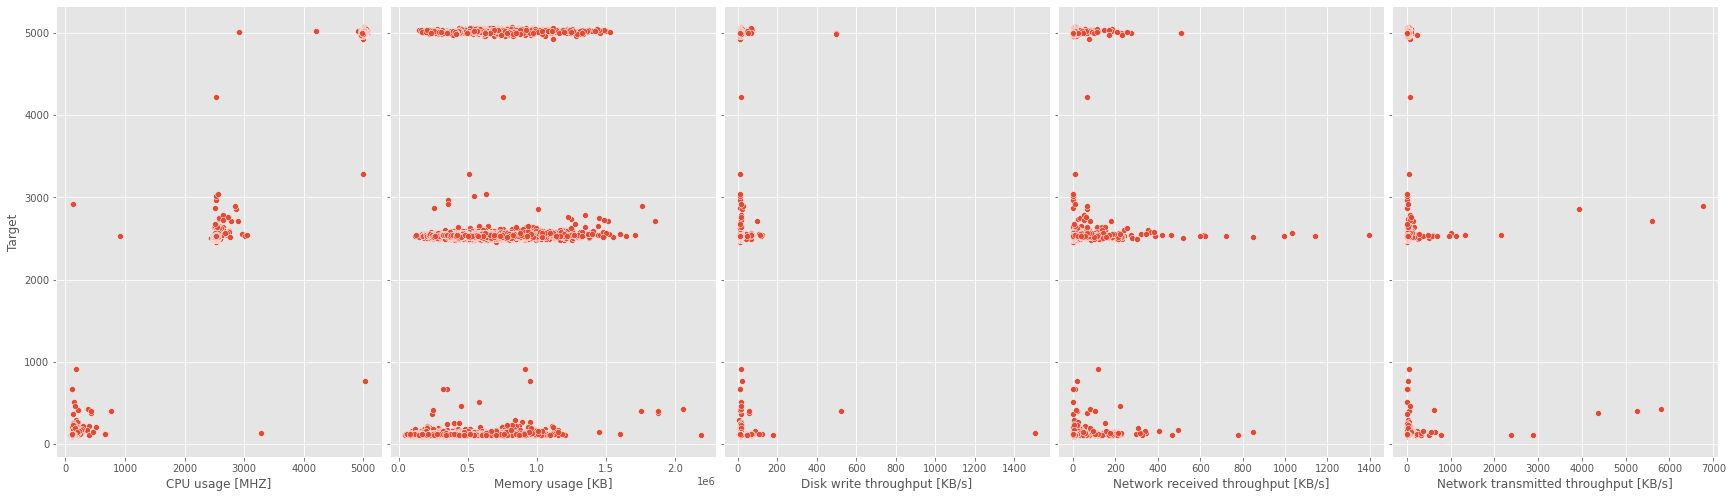

In [ ]:
sns.pairplot(new_data, x_vars=["CPU usage [MHZ]", "Memory usage [KB]",
            "Disk write throughput [KB/s]", "Network received throughput [KB/s]",
            "Network transmitted throughput [KB/s]"],
             y_vars='Target', height=7, aspect=0.7)

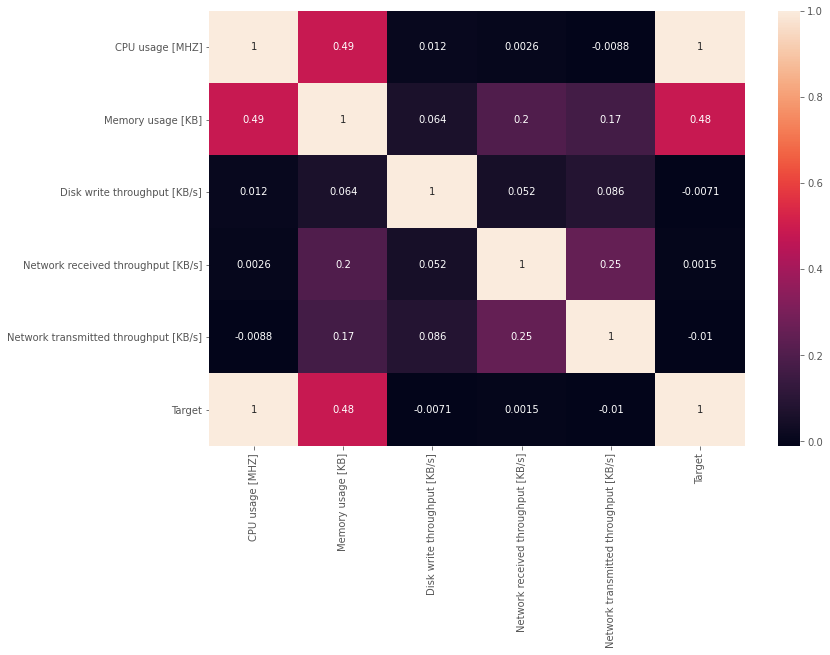

In [ ]:
# Viewing the heatmap
sns.heatmap(new_data.corr(), annot=True)

### From the correlation plot, only the CPU Usage and the Memory Usage have a strong relationship with the Target variable (Next CPU Utilized)


In [ ]:
new_data = new_data[["Timestamp", "CPU usage [MHZ]", "Memory usage [KB]", "Target"]]
new_data

Timestamp  CPU usage [MHZ]  Memory usage [KB]  Target
0      04.01.2016 00:00:00              115             122474   106.0
1      04.01.2016 00:05:00              106             119538   119.0
2      04.01.2016 00:10:00              119             329253   121.0
3      04.01.2016 00:15:00              121             284793   112.0
4      04.01.2016 00:20:00              112             348966   117.0
...                    ...              ...                ...     ...
10362  08.02.2016 23:30:00              125             276405   120.0
10363  08.02.2016 23:35:00              120             471859   114.0
10364  08.02.2016 23:40:00              114             343513   116.0
10365  08.02.2016 23:45:00              116              83467   116.0
10366  08.02.2016 23:50:00              116              83467   122.0

[10367 rows x 4 columns]

In [ ]:
# normalize the data after removing the timestamp column
scaled_data = scaler.fit_transform(new_data.drop(columns=["Timestamp"]))
scaled_data

array([[0.00402414, 0.03524599, 0.00221328],
       [0.00221328, 0.03387533, 0.00482897],
       [0.00482897, 0.13178007, 0.00523139],
       ...,
       [0.00382294, 0.13843731, 0.00422535],
       [0.00422535, 0.0170357 , 0.00422535],
       [0.00422535, 0.0170357 , 0.0054326 ]])

In [ ]:
scaled_data.shape

(10367, 3)

In [ ]:
# Create Feature and Target
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
print(X)
print(y)

[[0.00402414 0.03524599]
 [0.00221328 0.03387533]
 [0.00482897 0.13178007]
 ...
 [0.00382294 0.13843731]
 [0.00422535 0.0170357 ]
 [0.00422535 0.0170357 ]]
[0.00221328 0.00482897 0.00523139 ... 0.00422535 0.00422535 0.0054326 ]


In [ ]:
print(X.shape)
print(y.shape)

(10367, 2)
(10367,)


In [ ]:
# split data into training and test set
# using train_test_split will shuffle the data, let's avoid that for now
# although I think we can set that parameter to False
split = int(0.75 * len(X))
split

7775

In [ ]:
X_train = X[:split]
X_train.shape

(7775, 2)

In [ ]:
y_train = y[:split]
y_train.shape

(7775,)

In [ ]:
X_test = X[split:]
X_test.shape

(2592, 2)

In [ ]:
y_test = y[split:]
y_test.shape

(2592,)

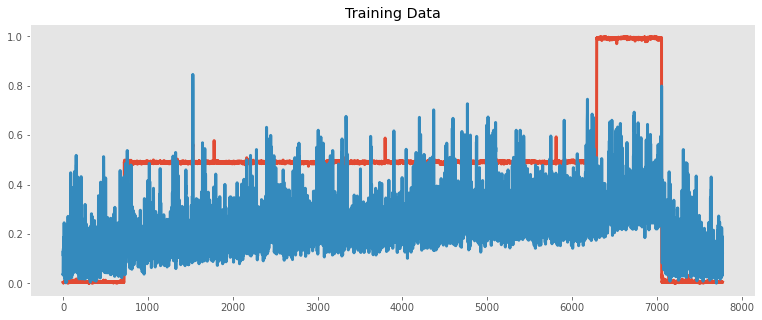

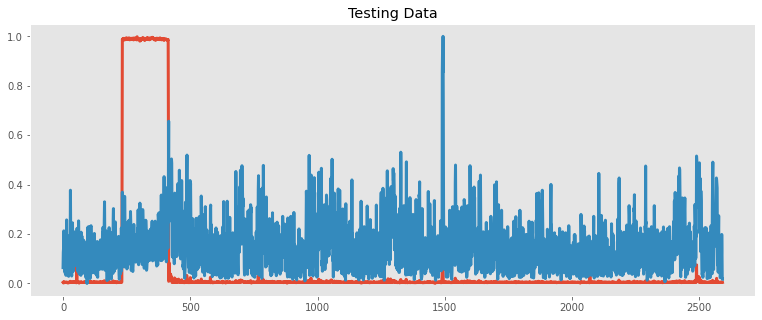

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize=(13, 5))
  plt.plot(data, linewidth=3)
  plt.title(title)
  plt.grid()

show_plot(X_train, "Training Data")
show_plot(X_test, "Testing Data")

In [ ]:
# Create and train the Ridge Linear Regression  Model
# Note that Ridge regression performs linear least squares with L2 regularization.
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=1)
regressor.fit(X_train, y_train)

# Test the model and calculate its accuracy 
lr_accuracy = regressor.score(X_test, y_test)
print('Ridge Regression Score', lr_accuracy)

Ridge Regression Score 0.9932422555068283


In [ ]:
# Make Prediction
predicted_memory_usage = regressor.predict(X)
predicted_memory_usage

from sklearn.metrics import r2_score

print("R^2: ", r2_score(y, predicted_memory_usage))

R^2:  0.9975975716236178


In [ ]:
# Get the RMSE on the test set
from sklearn.metrics import mean_squared_error

print("RMSE on test set: ", np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))

RMSE on test set:  0.020651546834138345


In [ ]:
# Append the predicted values into a list
predicted = []
for i in predicted_memory_usage:
  predicted.append(i)
print(len(predicted))
print(predicted)

10367
[0.005607265719653023, 0.0038040989487395983, 0.006197833195281087, 0.00664482745845128, 0.004772799165205167, 0.00579904271602397, 0.0038498473848281164, 0.0049820938450981424, 0.004440287477921004, 0.005936764734574782, 0.006676676002315173, 0.00507088060438027, 0.005753294279935449, 0.008557137193713512, 0.005383467054714992, 0.005779244861609705, 0.005050954341316266, 0.005621469197459712, 0.005793749872769325, 0.005351921070318599, 0.005647291370484226, 0.0068713372623987875, 0.00665644717978367, 0.005016221533739706, 0.005721875678074229, 0.006814095461398489, 0.005632786359324603, 0.0072615196665713555, 0.005710255956741839, 0.007424763350908312, 0.005684432757602761, 0.005612861122375164, 0.005581442520513944, 0.005879826519156544, 0.007166707562564414, 0.006366799664875358, 0.005773219516884891, 0.005796332603129058, 0.0056188864670999785, 0.006369986488055525, 0.005633088918792102, 0.00541217451756674, 0.0060744877792401585, 0.006487179176836465, 0.005225818773100178, 0

In [ ]:
# Append the original memory usage values from the scaled data to a list
close = []
for i in scaled_data:
  close.append(i[-1])
len(close)
print(close)

[0.002213279678068409, 0.004828973843058349, 0.005231388329979877, 0.0034205231388329954, 0.0044265593561368215, 0.002414486921529173, 0.0036217303822937627, 0.0030181086519114678, 0.0044265593561368215, 0.005231388329979877, 0.0038229376257545265, 0.004225352112676054, 0.007444668008048289, 0.00402414486921529, 0.0044265593561368215, 0.0036217303822937627, 0.00402414486921529, 0.004225352112676054, 0.0038229376257545265, 0.00402414486921529, 0.005432595573440644, 0.005231388329979877, 0.0038229376257545265, 0.004225352112676054, 0.005432595573440644, 0.004225352112676054, 0.005835010060362172, 0.004225352112676054, 0.0060362173038229355, 0.004225352112676054, 0.00402414486921529, 0.00402414486921529, 0.004225352112676054, 0.005633802816901408, 0.005231388329979877, 0.0044265593561368215, 0.004225352112676054, 0.00402414486921529, 0.004828973843058349, 0.00402414486921529, 0.0038229376257545265, 0.0044265593561368215, 0.005030181086519113, 0.0038229376257545265, 0.0044265593561368215, 

In [ ]:
# Create a dataframe based on the dates 
df_predicted = new_data[["Timestamp"]]
df_predicted

Timestamp
0      04.01.2016 00:00:00
1      04.01.2016 00:05:00
2      04.01.2016 00:10:00
3      04.01.2016 00:15:00
4      04.01.2016 00:20:00
...                    ...
10362  08.02.2016 23:30:00
10363  08.02.2016 23:35:00
10364  08.02.2016 23:40:00
10365  08.02.2016 23:45:00
10366  08.02.2016 23:50:00

[10367 rows x 1 columns]

In [ ]:
# Add the close values to the dataframe
df_predicted["Actual CPU usage"] = close
df_predicted

Timestamp  Actual CPU usage
0      04.01.2016 00:00:00          0.002213
1      04.01.2016 00:05:00          0.004829
2      04.01.2016 00:10:00          0.005231
3      04.01.2016 00:15:00          0.003421
4      04.01.2016 00:20:00          0.004427
...                    ...               ...
10362  08.02.2016 23:30:00          0.005030
10363  08.02.2016 23:35:00          0.003823
10364  08.02.2016 23:40:00          0.004225
10365  08.02.2016 23:45:00          0.004225
10366  08.02.2016 23:50:00          0.005433

[10367 rows x 2 columns]

In [ ]:
# Add the predicted values to the dataframe
df_predicted["Prediction"] = predicted
df_predicted

Timestamp  Actual CPU usage  Prediction
0      04.01.2016 00:00:00          0.002213    0.005607
1      04.01.2016 00:05:00          0.004829    0.003804
2      04.01.2016 00:10:00          0.005231    0.006198
3      04.01.2016 00:15:00          0.003421    0.006645
4      04.01.2016 00:20:00          0.004427    0.004773
...                    ...               ...         ...
10362  08.02.2016 23:30:00          0.005030    0.007456
10363  08.02.2016 23:35:00          0.003823    0.006252
10364  08.02.2016 23:40:00          0.004225    0.005180
10365  08.02.2016 23:45:00          0.004225    0.005848
10366  08.02.2016 23:50:00          0.005433    0.005848

[10367 rows x 3 columns]

In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot2(df, title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Timestamp'], y=df[i], name=i)
  fig.show()

In [ ]:
# Plot the results
interactive_plot2(df_predicted, "Original vs. Predictions")


## Using LSTM Model

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
# adding extra dimension
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((7775, 2, 1), (2592, 2, 1))

In [ ]:
# create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences=True)(inputs)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2, 1)]            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 2, 150)            91200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 2, 150)            180600    
_________________________________________________________________
lstm_11 (LSTM)               (None, 2, 150)            180600    
_________________________________________________________________
dense_3 (Dense)              (None, 2, 1)              151       
Total params: 452,551
Trainable params: 452,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[
                    # Stopping our training if val_loss doesn't improve after 20 epochs
                    keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=20),
                    # Saving the best weights of our model in the model directory
        
                    # We don't want to save just the weight, but also the model architecture
                    keras.callbacks.ModelCheckpoint('/content/model_{val_loss:.7f}.h5',
                                                       save_best_only=True,
                                                       save_weights_only=False,
                                                       monitor='val_loss')])

Epoch 1/30
243/243 [==============================] - 4s 15ms/step - loss: 1.9432e-04 - root_mean_squared_error: 0.0139 - val_loss: 5.4496e-04 - val_root_mean_squared_error: 0.0233
Epoch 2/30
243/243 [==============================] - 4s 16ms/step - loss: 1.8902e-04 - root_mean_squared_error: 0.0137 - val_loss: 4.2898e-04 - val_root_mean_squared_error: 0.0207
Epoch 3/30
243/243 [==============================] - 4s 16ms/step - loss: 2.0915e-04 - root_mean_squared_error: 0.0145 - val_loss: 4.3770e-04 - val_root_mean_squared_error: 0.0209
Epoch 4/30
243/243 [==============================] - 4s 16ms/step - loss: 1.9339e-04 - root_mean_squared_error: 0.0139 - val_loss: 4.3538e-04 - val_root_mean_squared_error: 0.0209
Epoch 5/30
243/243 [==============================] - 4s 16ms/step - loss: 1.9127e-04 - root_mean_squared_error: 0.0138 - val_loss: 4.8379e-04 - val_root_mean_squared_error: 0.0220
Epoch 6/30
243/243 [==============================] - 4s 16ms/step - loss: 1.8997e-04 - root_me

In [ ]:
# Performance Evaluation
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

Text(0.5, 0, 'epoch')

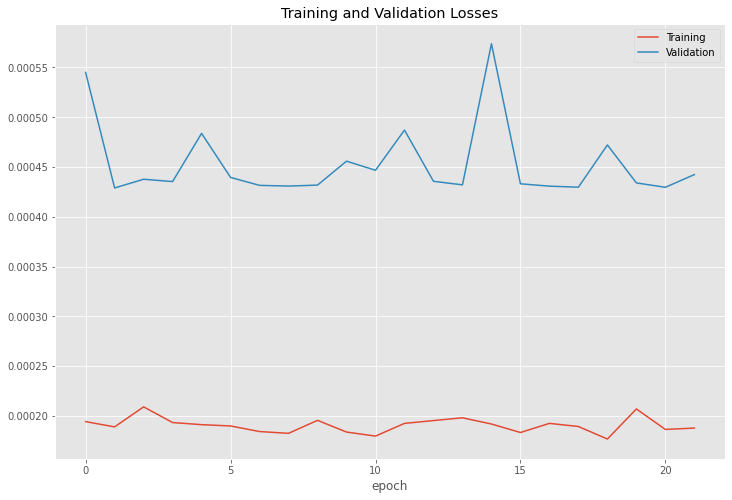

In [ ]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

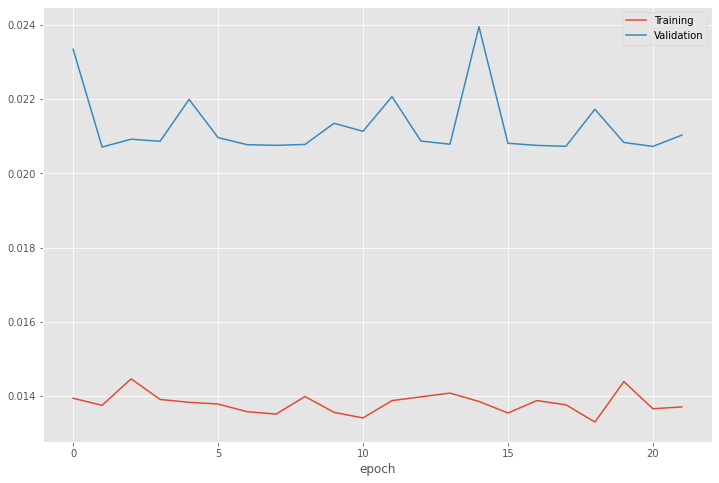

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [ ]:
# loading the best perfoming model
model = keras.models.load_model('/content/model_0.0004290.h5')

# Make Predictions on the entire dataset
predicted_cpu_usage = model.predict(X)
predicted_cpu_usage


array([[[0.00365774],
        [0.00383854]],

       [[0.00173613],
        [0.00180623]],

       [[0.00451123],
        [0.00413901]],

       ...,

       [[0.00344432],
        [0.00299497]],

       [[0.00387115],
        [0.00421107]],

       [[0.00387115],
        [0.00421107]]], dtype=float32)

In [ ]:
# Append the predicted values into a list
predicted = []
for i in predicted_cpu_usage:
  predicted.append(i[0][0])
print(len(predicted))
print(predicted) 

10367
[0.0036577396, 0.0017361306, 0.0045112297, 0.0049378574, 0.0030173995, 0.0040845387, 0.0019497387, 0.0032308847, 0.0025904179, 0.0040845387, 0.0049378574, 0.0034443215, 0.003871154, 0.007282721, 0.0036577396, 0.0040845387, 0.0032308847, 0.0036577396, 0.003871154, 0.0034443215, 0.0036577396, 0.005151119, 0.0049378574, 0.0034443215, 0.003871154, 0.005151119, 0.003871154, 0.0055776276, 0.003871154, 0.0057908185, 0.003871154, 0.003657747, 0.0036577396, 0.003871154, 0.005364388, 0.0049378574, 0.0040845387, 0.003871154, 0.0036577396, 0.0045112297, 0.0036577396, 0.0034443215, 0.0040845387, 0.004724562, 0.0034443215, 0.0040845387, 0.0055776276, 0.005151119, 0.0040845387, 0.007282721, 0.0019497387, 0.0036577396, 0.0030173995, 0.0036577396, 0.0036577396, 0.003871154, 0.0036577396, 0.0036577396, 0.0055776276, 0.0055776276, 0.003871154, 0.0030173995, 0.0006678365, 0.003657747, 0.0036577396, 0.0049378574, 0.003871154, 0.0049378574, 0.003871154, 0.003871154, 0.0055776276, 0.0049378574, 0.00387

In [ ]:
# Get R^2 Score on the entire dataset
from sklearn.metrics import r2_score

print("R^2: ", r2_score(y, predicted))

R^2:  0.9975957553677316


In [ ]:
# Get the RMSE on the test set
from sklearn.metrics import mean_squared_error
predicted_test_set = model.predict(X_test)
y_pred = []
for i in predicted_test_set:
  y_pred.append(i[0][0])
print(len(y_pred))
print(y_pred) 

print("RMSE on test set: ", np.sqrt(mean_squared_error(y_test, y_pred)))

2592
[0.00429789, 0.005364388, 0.0021633096, 0.0057908185, 0.002376873, 0.005364388, 0.0034443215, 0.0036577396, 0.0034443215, 0.005151119, 0.0036577396, 0.0034443215, 0.003871154, 0.004724562, 0.0055776276, 0.0040845387, 0.0025904179, 0.0040845387, 0.0036577396, 0.0017361306, 0.0015225187, 0.0015225187, 0.0019497387, 0.0028039142, 0.00429789, 0.0062172003, 0.0036577396, 0.0055776276, 0.008560676, 0.006856587, 0.0040845685, 0.003871154, 0.0040845387, 0.00429789, 0.003871154, 0.003871154, 0.003871154, 0.0070696585, 0.00429789, 0.00429789, 0.003871154, 0.0057908185, 0.00429789, 0.0055776276, 0.0034443215, 0.005364388, 0.003871154, 0.004724562, 0.00429789, 0.0057908185, 0.00429789, 0.0034443215, 0.0021633096, 0.00429789, 0.11824226, 0.0055776276, 0.0040845387, 0.0057908185, 0.003871154, 0.0049378574, 0.003871154, 0.0064303353, 0.003657747, 0.0008815415, 0.0028039142, 0.005151119, 0.003871154, 0.0034443215, 0.00429789, 0.0055776276, 0.0034443215, 0.0049378574, 0.003871154, 0.0055776276, 0.

In [ ]:
# # Append the original cpu usage values to the list
# orig = []
# for i in scaled_data:
#   orig.append(i[-1])
# len(orig)

10367

In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = new_data[["Timestamp"]]
df_predicted

Timestamp
0      04.01.2016 00:00:00
1      04.01.2016 00:05:00
2      04.01.2016 00:10:00
3      04.01.2016 00:15:00
4      04.01.2016 00:20:00
...                    ...
10362  08.02.2016 23:30:00
10363  08.02.2016 23:35:00
10364  08.02.2016 23:40:00
10365  08.02.2016 23:45:00
10366  08.02.2016 23:50:00

[10367 rows x 1 columns]

In [ ]:
# Add the close values to the dataframe
df_predicted["Actual CPU Utilized"] = close
df_predicted

Timestamp  Actual CPU Utilized
0      04.01.2016 00:00:00             0.002213
1      04.01.2016 00:05:00             0.004829
2      04.01.2016 00:10:00             0.005231
3      04.01.2016 00:15:00             0.003421
4      04.01.2016 00:20:00             0.004427
...                    ...                  ...
10362  08.02.2016 23:30:00             0.005030
10363  08.02.2016 23:35:00             0.003823
10364  08.02.2016 23:40:00             0.004225
10365  08.02.2016 23:45:00             0.004225
10366  08.02.2016 23:50:00             0.005433

[10367 rows x 2 columns]

In [ ]:
# Add the predicted values to the dataframe
df_predicted["Prediction"] = predicted
df_predicted

Timestamp  Actual CPU Utilized  Prediction
0      04.01.2016 00:00:00             0.002213    0.003658
1      04.01.2016 00:05:00             0.004829    0.001736
2      04.01.2016 00:10:00             0.005231    0.004511
3      04.01.2016 00:15:00             0.003421    0.004938
4      04.01.2016 00:20:00             0.004427    0.003017
...                    ...                  ...         ...
10362  08.02.2016 23:30:00             0.005030    0.005791
10363  08.02.2016 23:35:00             0.003823    0.004725
10364  08.02.2016 23:40:00             0.004225    0.003444
10365  08.02.2016 23:45:00             0.004225    0.003871
10366  08.02.2016 23:50:00             0.005433    0.003871

[10367 rows x 3 columns]

In [ ]:
# Plot the results
interactive_plot2(df_predicted, "Original vs. Predictions")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
